# ENPH 213 - Week 5 Lab

In this lab, we will be working on solving non-linear equations using a variety of methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab5, where LastName is your last name.  Submit that file to onQ.  Please be aware of a second notebook for Part 6.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Parts 5 and 6 will be marked together (Weighted out of 5).

## Part 1

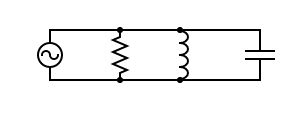

The impedance (Z) of a parallel RLC circuit, such as the one shown, can be represented as

$\Large \frac{1}{Z} = \sqrt{\frac{1}{R^2} + (\omega C - \frac{1}{\omega L})^2 }$

where R is the resistance, $C$ is the capacitance, and $L$ is the inductance.  Of note, the capacitance and inductance contribute a frequency ($\omega$) dependent contribution to $Z$.

Create a function $MyBisect(f, xa, xb)$ that can determine which frequency $\omega$ will give an impedance of $100~\Omega$ and uses the Bisection Method.  Use the following values for $R = 200~\Omega$, $L = 0.4$ H, and $C = 3 \times 10^{-6}$ F.  Determine $\omega$ to within a range of 0.00001, and justify your choice of $xa$ and $xb$.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
C = 3*10**-6
R = 200
L = 0.4 #defining given constants

def ParImp(w):
    return 1/(np.sqrt((1/R**2)+(w*C-(1/(w*L)))**2))-100 #define function for calculating parallel impedance

def MyBisect(f,xa,xb):
    i = 0
    while((xb-xa) > 0.00001):
        xm = (xa+xb)/2 # define midpoint
        if(f(xa)*f(xm) < 0): #if this happens move the left side in 
            xb = xm
        elif(f(xb)*f(xm) < 0) :
            xa = xm
        i+=1
    print(i) #this will be the number of interations
    return xm #returns midpoint which is the value we're looking for


In [4]:
MyBisect(ParImp,100,300)

25


264.4494593143463

# Part 2

Consider the tank on a water truck, which approximates as a cylinder lying on its side.  The diameter of the tank is 2.3 m and its length is 5.9 m.  For a cylinder lying horizontal, the volume a liquid $V$ will occupy at a height $x$ in the cylinder is

$\Large V = \left[r^2 \cos^{-1}\left( \frac{r-x}{r} \right) - (r-x)\sqrt{2rx-x^2}  \right] L$

where $r$ is the radius of the cylinder and $L$ is its length.  Create a function $MyNewton(f, fderiv, x1)$ that can accept a function and its derivative to determine the height of water in the tank for a specific volume.  In particular, what height of water in the tank is needed for a job requiring 14 m$^3$ of water.  Estimate the error in the height using the relation

$\Large error = \left| \frac{x_{i+1} - x_i}{x_i} \right|$

Determine $x$ to within an error of 0.00001.  Print the determined value for $x$ and the number of iterations it took to acheive it.  Note: $\cos^{-1} = \arccos$

You can validate your code by considering a tank that is half full.

In [5]:
r = 2.3/2
L = 5.9
def V(r,x,L): #main volume function
    return ((r**2)*np.arccos((r-x)/r)-(r-x)*np.sqrt(2*r*x-x**2))*L

def fderiv(r,x,L): #the calculated derivative of the volume function
    return -(2*L*x*r-4*L*r**2*np.arccos((r-x)/r)+np.sqrt(2*x*r-x**2)*(L*abs(r)+3*L*r - 2*L*x))/(2*r-x)

def MyNewton(f, fderiv, x1):
    i = 0
    b = 0 #break condition
    while(b == 0):
        next = x1 - (f(r,x1,L)-14)/fderiv(r,x1,L)
        if(abs((next-x1)/x1) < 0.00001): #checks if the error is less than the threshold 
            b = 1
        x1 = next
        i+=1
    print(i) #number of iterations it takes
    return x1

MyNewton(V,fderiv,1)

11


1.2787531295966512

# Part 3

Create a function $MySecant (f, x1, x2)$ employing the Secant Method to solve the RLC-circuit question from Part 1 and determining the which frequency $\omega$ will give the same impedance of $100~\Omega$.  Determine $\omega$ to within a range of 0.00001 using an error estimate as in Part 2.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

In [6]:
L = 0.4 #used L in part 2 so have to redefine it
def MySecant(f, x1, x2):
    i = 0
    b = 0
    while(b == 0): # same idea as part two with break condition
        dterm = (x2-x1)/(f(x2)-f(x1))
        next = x2 - f(x2)*dterm
        if(abs((next-x1)/x1) < 0.00001): #checks if the error is less than the threshold 
            b = 1
        x1 = x2
        x2 = next #this is the main part changed from part 2
        i+=1
    print(i) #number of iterations it takes
    return x1
MySecant(ParImp,200,300)

5


264.449454687002

# Part 4

We can determine how much of your ice cubes are below the surface of your drink.  As will all good physics calculations, we will approximate an ice cube as a sphere.  When placed in the water, gravity will pull the ice cube down with a force $F_g = mg$, where $m$ is the mass of the ice cube $m = \rho V$, where $\rho$ is the density of the ice $\rho_{ice} = 0.917 g/cm^3$ and $V$ is the volume of a sphere $V_{sphere} = \frac{4}{3} \pi r^3$.

As the ice cube sinks in the liquid, Archimedes' Principle states that the upward force is equal to the weight of the fluid displaced by the ice cube.  Of note here, assume that the density of the liquid is that of water, $\rho_{water} = 1.00 g/cm^3$, and the volume of the sphere exposed a height $d$ **above** the surface of the liquid is 

$\large V_{above} = \frac{\pi d^2}{3}(3r-d)$.

Determine the equation to solve, and choose one of the above methods to determine the result.  Assume that the radius of the ice cube is 1.00 cm.

$Q$:  Does you answer seem reasonable?  Instead of an ice cube, consider a ping pong ball with a density of $0.1 g/cm^3$.  Is it what you would expect?

In [7]:
dIce = 0.917 #define densitys
dWater = 1

def Balance1(d):
    m = (4/3)*np.pi*(dWater**3)*dIce
    return (m-((np.pi*d**2)/3)*(3*dWater-d))

dPing = 0.1
dWater = 1 #define densitys again

def Balance2(d):
    m = (4/3)*np.pi*(dWater**3)*dPing
    return (m-((np.pi*d**2)/3)*(3*dWater-d))


print(MySecant(Balance1,0.5,0.4))

print(MySecant(Balance2, 0.5, 0.4))

9
1.6457633053473473
5
0.39160021131820805


# Part 5

In the lecture, we looked at the Kronig-Penny model for the movement of an electron in a crystal.  The analytical solution from Schrodinger's equation is:

$\Large P' \frac{\sin \alpha a}{\alpha a} + \cos \alpha a = \cos k a$

where the energy $E$ is embedded in the $\alpha$ term.  To simplify the calculation of this equation, we will replace all constants with "1", which leaves

$\Large \frac{\sin E}{E} + \cos E = \cos k$

Solve this equations for different values of $k$ from 0 to 3$\pi$, in the ranges $0 \leq k \leq \pi$, $\pi \leq k \leq 2\pi$, $2\pi \leq k \leq 3\pi$, and using at least 50 points per range.  The function will have multiple roots that will oscillate.  Given that we are solving for Energy, there can be only 1 value of $E$ for any value of $k$. So, use the lowest root for the first range of $k$, the second root for the next range of $k$, etc.  Your solutions should replicate the figure in the notes.  One feature you should observe is that as $E$ approaches the end of the range, its slope should go to zero.  When plotting, use 3 different plots, otherwise they will be connected across the gaps.

Ideally, this is performed in a single FOR loop.

[1.30654237 1.30808581 1.31270511 1.32036759 1.33102004 1.34459049
 1.36099047 1.38011767 1.40185871 1.42609205 1.45269064 1.48152444
 1.51246265 1.54537553 1.58013598 1.61662066 1.65471088 1.69429321
 1.73525981 1.77750857 1.82094313 1.86547265 1.91101163 1.95747951
 2.00480027 2.05290193 2.10171605 2.15117708 2.20122171 2.25178813
 2.30281508 2.35424086 2.4060021  2.45803201 2.51025848 2.56260132
 2.6149686  2.66725162 2.71931777 2.77100015 2.82208256 2.87227693
 2.92118931 2.96826896 3.01273317 3.05346446 3.08889452 3.11694665
 3.13521474 1.        ]


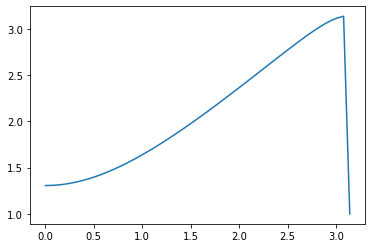

In [88]:
def MySecant(f, x1, x2): #redefining function so it doesn't print the number of iterations
    i = 0
    b = 0
    while(b == 0): # same idea as part two with break condition
        dterm = (x2-x1)/(f(x2)-f(x1))
        next = x2 - f(x2)*dterm
        if(abs((next-x1)/x1) < 0.00001): #checks if the error is less than the threshold 
            b = 1
        x1 = x2
        x2 = next #this is the main part changed from part 2
        i+=1 #number of iterations it takes
    return x1 
k1 = np.linspace(0,np.pi,50)
k2 = np.linspace(np.pi,2*np.pi,50) #setting the ranges
k3 = np.linspace(2*np.pi,3*np.pi,50)

rootsk1 = np.ones(50)
rootsk2 = np.ones(50)
rootsk3 = np.ones(50)

def E(k):
    return lambda E: np.sin(E)/E+np.cos(E)-np.cos(k)

for i in range(49):
    rootsk1[i] = MySecant(E(k1[i]),1,2)
    rootsk2[i] = MySecant(E(k2[i]),4.5,5.5)
    rootsk3[i] = MySecant(E(k3[i]),7.5,8)
    
plt.plot(k1,rootsk1)
print(rootsk1)

[3.67319441 3.67974946 3.69854953 3.72749039 3.76416899 3.8065127
 3.85295901 3.90239726 3.95405302 4.0073852  4.062011   4.11765509
 4.17411565 4.23124194 4.28891936 4.34705914 4.40559154 4.46446074
 4.52362151 4.58303656 4.64267481 4.7025099  4.76251921 4.82268297
 4.8829837  4.94340561 5.00393421 5.06455588 5.12525755 5.18602633
 5.24684917 5.3077124  5.36860136 5.42949968 5.49038861 5.55124586
 5.61204422 5.67274927 5.73331651 5.79368568 5.85377348 5.91345999
 5.97256556 6.03080896 6.0877266  6.14250931 6.1936557  6.23825071
 6.27078324 1.        ]


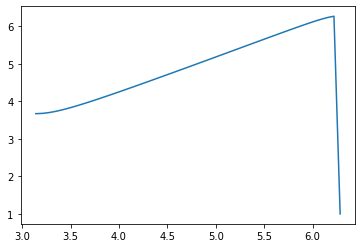

In [89]:
plt.plot(k2,rootsk2)
print(rootsk2)

[6.58462007 6.59705779 6.62969713 6.67447117 6.72586824 6.78097412
 6.83828829 6.89700213 6.95665317 7.01696147 7.07774842 7.13889595
 7.2003224  7.26196973 7.32379555 7.38576794 7.44786263 7.51006056
 7.57234651 7.6347082  7.69713544 7.7596197  7.82215367 7.88473091
 7.9473458  8.00999312 8.07266805 8.13536594 8.19808223 8.26081225
 8.32355111 8.38629353 8.4490336  8.51176452 8.57447822 8.6371648
 8.6998121  8.76240399 8.82491939 8.88732932 8.94959271 9.01164997
 9.07340822 9.13471847 9.19532387 9.25474423 9.3119871  9.3647338
 9.40694515 1.        ]


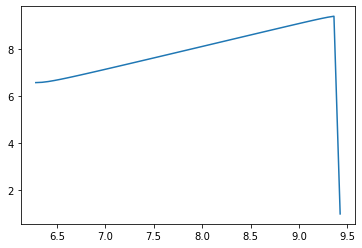

In [90]:
plt.plot(k3,rootsk3)
print(rootsk3)

# Part 6

To come later in a separate notebook.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.